# AutoEncoder (Input: MNIST, Output: MNIST)

>10-1-autoencoder 프로그램에서 latent representation (z data)을 다른 형태로 바꾸었을 때 autoencoder의 performance가 증가하는지 감소하는지 비교하라.
>
>1) 어떤 형태의 latent representation을 사용하였는가?
>   z_dim 변경 (3차원으로) 

>2) performance는 무엇으로 측정할 수 있는가?
>
>test set 의 입력과 출력의 결과 값이 같은지 loss를 보면 performance 측정 가능하다.
>
>z-dim 변경으로 loss 가 약간 줄어들고 성능이 약간 더 좋아졌다.


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# 자신의 Google Disk home을 colab server의 어떤 directory로 mount 할 지 이름을 정합니다. 
# 아래의 예에서는 "/drive"에 mount 하였습니다.
# 실제로 colab server는 '/drive/My Drive' directory에 자신의 Google Disk home을 가지게 됩니다. 

from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [3]:
import os
import sys
# path를 append: 나의 source directory는 Google Disk의 Colab Notebooks/Lecture 아래에 있다고 가정
sys.path.append('/drive/My Drive/Colab Notebooks/Lecture')
# local library인 utils.loaders와 models.AE class를 import
from utils.loaders import load_mnist, load_model
from models.AE import Autoencoder
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## 매개변수 설정

In [0]:
# 실행 매개변수
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = '/drive/My Drive/Colab Notebooks/Lecture/run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.makedirs(os.path.join(RUN_FOLDER, 'viz'))
    os.makedirs(os.path.join(RUN_FOLDER, 'images'))
    os.makedirs(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

## Loading Data (데이터 읽어오기)

In [5]:
(x_train, y_train), (x_test, y_test) = load_mnist()

11493376/11490434 [==============================] - 1s 0us/step


## Creating AutoEncoder (신경망 구조 정의)

In [6]:
AE = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

print(MODE)
if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
build


In [7]:
AE.encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0   

In [8]:
AE.decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0   

## Training AutoEncoder (오토인코더 훈련)

In [0]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [0]:
AE.compile(LEARNING_RATE)

In [11]:
AE.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = 200
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)


Epoch 1/200
 352/1000 [=========>....................] - ETA: 23s - loss: 0.2278

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (6.254399). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (3.127779). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 13s 13ms/step - loss: 0.1776

Epoch 00001: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 2/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0913

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.391809). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.196431). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 871us/step - loss: 0.0809

Epoch 00002: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 3/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0687

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.346078). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.173738). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 808us/step - loss: 0.0678

Epoch 00003: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 4/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0662

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.364880). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.182890). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 812us/step - loss: 0.0653

Epoch 00004: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 5/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0636

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.333399). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.167217). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 773us/step - loss: 0.0619

Epoch 00005: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 6/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0599

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.351764). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.176408). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 809us/step - loss: 0.0593

Epoch 00006: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 7/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0572

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.336690). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.168813). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 790us/step - loss: 0.0574

Epoch 00007: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 8/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0554

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.328209). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.165002). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 773us/step - loss: 0.0560

Epoch 00008: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 9/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0536

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.492532). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.246724). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 937us/step - loss: 0.0549

Epoch 00009: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 10/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0520

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.471832). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.238153). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 922us/step - loss: 0.0539

Epoch 00010: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 11/200
 448/1000 [============>.................] - ETA: 1s - loss: 0.0527

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.254269). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.627592). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 2s 2ms/step - loss: 0.0533

Epoch 00011: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 12/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0531

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.372089). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.186554). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 820us/step - loss: 0.0528

Epoch 00012: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 13/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0517

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.345909). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.173556). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 794us/step - loss: 0.0524

Epoch 00013: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 14/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0521

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.400841). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.200904). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 852us/step - loss: 0.0518

Epoch 00014: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 15/200
 352/1000 [=========>....................] - ETA: 10s - loss: 0.0515

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (5.412268). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (2.706572). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 6s 6ms/step - loss: 0.0513

Epoch 00015: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 16/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0518

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.424204). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.212564). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 891us/step - loss: 0.0510

Epoch 00016: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 17/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0505

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.459803). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.230451). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 899us/step - loss: 0.0507

Epoch 00017: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 18/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0510

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.321304). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.161441). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 767us/step - loss: 0.0506

Epoch 00018: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 19/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0510

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.489283). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.245259). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 941us/step - loss: 0.0502

Epoch 00019: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 20/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0488

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.475559). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.238281). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 923us/step - loss: 0.0498

Epoch 00020: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 21/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0494

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.335699). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.168998). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 794us/step - loss: 0.0496

Epoch 00021: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 22/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0501

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.334265). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.167645). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 784us/step - loss: 0.0493

Epoch 00022: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 23/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0487

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.357603). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.179246). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 802us/step - loss: 0.0491

Epoch 00023: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 24/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0498

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.423387). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.212395). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 871us/step - loss: 0.0490

Epoch 00024: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 25/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0479

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.342758). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.171828). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 782us/step - loss: 0.0488

Epoch 00025: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 26/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0488

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.334092). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.167496). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 780us/step - loss: 0.0486

Epoch 00026: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 27/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0478

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.346597). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.173932). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 801us/step - loss: 0.0482

Epoch 00027: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 28/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0477

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.324855). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.162881). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 783us/step - loss: 0.0480

Epoch 00028: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 29/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0468

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.450140). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.225711). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 909us/step - loss: 0.0480

Epoch 00029: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 30/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0483

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.333270). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.167233). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 783us/step - loss: 0.0478

Epoch 00030: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 31/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0459

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.400678). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.201118). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 839us/step - loss: 0.0474

Epoch 00031: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 32/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0469

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.564037). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.282628). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0473

Epoch 00032: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 33/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0467

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.410836). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.205938). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 848us/step - loss: 0.0472

Epoch 00033: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 34/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0471

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.470474). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.235808). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 913us/step - loss: 0.0472

Epoch 00034: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 35/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0460

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.442978). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.221993). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 884us/step - loss: 0.0465

Epoch 00035: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 36/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0459

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.340049). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.170716). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 788us/step - loss: 0.0464

Epoch 00036: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 37/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0460

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.354731). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.177806). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 805us/step - loss: 0.0463

Epoch 00037: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 38/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0463

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.399271). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.200094). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 852us/step - loss: 0.0462

Epoch 00038: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 39/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0450

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.363750). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.183699). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 823us/step - loss: 0.0460

Epoch 00039: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 40/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0457

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.339177). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.170005). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 777us/step - loss: 0.0458

Epoch 00040: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 41/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0461

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.360399). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.180759). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 801us/step - loss: 0.0457

Epoch 00041: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 42/200
 448/1000 [============>.................] - ETA: 1s - loss: 0.0463

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.656566). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.328859). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0455

Epoch 00042: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 43/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0456

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.416110). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.209927). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 855us/step - loss: 0.0457

Epoch 00043: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 44/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0466

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.413420). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.207151). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 868us/step - loss: 0.0455

Epoch 00044: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 45/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0448

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.387384). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.194439). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 830us/step - loss: 0.0450

Epoch 00045: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 46/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0451

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.437718). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.219522). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 879us/step - loss: 0.0449

Epoch 00046: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 47/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0448

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.322889). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.161875). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 772us/step - loss: 0.0450

Epoch 00047: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 48/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0435

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.447197). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.223998). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 895us/step - loss: 0.0447

Epoch 00048: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 49/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0444

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.421920). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.211588). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 878us/step - loss: 0.0445

Epoch 00049: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 50/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0450

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.407989). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.204404). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 862us/step - loss: 0.0445

Epoch 00050: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 51/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0452

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.358938). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.180052). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 801us/step - loss: 0.0445

Epoch 00051: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 52/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0435

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.446157). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.223575). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 890us/step - loss: 0.0442

Epoch 00052: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 53/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0439

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.363815). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.182358). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 800us/step - loss: 0.0438

Epoch 00053: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 54/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0427

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.407613). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.204438). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 869us/step - loss: 0.0438

Epoch 00054: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 55/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0440

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.351981). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.176537). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 800us/step - loss: 0.0440

Epoch 00055: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 56/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0439

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.477938). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.239878). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 915us/step - loss: 0.0434

Epoch 00056: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 57/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0431

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.434160). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.217569). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 892us/step - loss: 0.0432

Epoch 00057: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 58/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0420

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.454628). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.228665). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 904us/step - loss: 0.0430

Epoch 00058: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 59/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0423

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.350055). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.175599). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 790us/step - loss: 0.0427

Epoch 00059: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 60/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0438

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.341451). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.171204). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 781us/step - loss: 0.0426

Epoch 00060: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 61/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0431

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.407684). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.204289). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 859us/step - loss: 0.0431

Epoch 00061: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 62/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0448

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.372126). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.186568). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 808us/step - loss: 0.0429

Epoch 00062: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 63/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0424

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.464659). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.233191). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 914us/step - loss: 0.0427

Epoch 00063: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 64/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0430

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.393699). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.197301). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 839us/step - loss: 0.0429

Epoch 00064: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 65/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0424

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.443337). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.222205). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 889us/step - loss: 0.0424

Epoch 00065: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 66/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0423

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.388679). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.194930). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 830us/step - loss: 0.0420

Epoch 00066: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 67/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0421

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.402537). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.201757). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 841us/step - loss: 0.0419

Epoch 00067: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 68/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0412

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.484966). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.242965). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 941us/step - loss: 0.0416

Epoch 00068: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 69/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0425

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.424840). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.213004). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 879us/step - loss: 0.0419

Epoch 00069: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 70/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0412

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.391187). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.196030). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 825us/step - loss: 0.0416

Epoch 00070: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 71/200
 448/1000 [============>.................] - ETA: 1s - loss: 0.0411

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.319887). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.660400). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 2s 2ms/step - loss: 0.0416

Epoch 00071: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 72/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0426

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.432532). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.217333). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 883us/step - loss: 0.0415

Epoch 00072: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 73/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0420

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.460092). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.230537). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 898us/step - loss: 0.0414

Epoch 00073: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 74/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0406

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.443954). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.222466). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 894us/step - loss: 0.0412

Epoch 00074: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 75/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0428

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.350251). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.175590). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 794us/step - loss: 0.0415

Epoch 00075: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 76/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0401

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.381085). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.190946). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 832us/step - loss: 0.0410

Epoch 00076: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 77/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0422

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.324978). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.163098). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 763us/step - loss: 0.0408

Epoch 00077: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 78/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0403

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.364974). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.183047). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 809us/step - loss: 0.0407

Epoch 00078: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 79/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0399

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.378122). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.189991). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 817us/step - loss: 0.0405

Epoch 00079: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 80/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0405

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.455450). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.228218). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 894us/step - loss: 0.0406

Epoch 00080: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 81/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0402

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.492661). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.248005). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 944us/step - loss: 0.0411

Epoch 00081: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 82/200
 448/1000 [============>.................] - ETA: 1s - loss: 0.0420

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.864115). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.432521). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0408

Epoch 00082: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 83/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0405

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.386828). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.194082). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 829us/step - loss: 0.0406

Epoch 00083: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 84/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0401

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.527094). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.264064). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 962us/step - loss: 0.0403

Epoch 00084: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 85/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0393

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.325260). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.164932). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 770us/step - loss: 0.0400

Epoch 00085: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 86/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0403

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.327334). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.164086). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 774us/step - loss: 0.0403

Epoch 00086: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 87/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0398

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.344312). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.172643). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 792us/step - loss: 0.0402

Epoch 00087: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 88/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0394

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.435941). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.218531). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 878us/step - loss: 0.0397

Epoch 00088: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 89/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0402

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.461978). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.231696). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 907us/step - loss: 0.0402

Epoch 00089: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 90/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0399

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.437172). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.219329). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 884us/step - loss: 0.0398

Epoch 00090: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 91/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0394

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.430086). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.215547). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 877us/step - loss: 0.0397

Epoch 00091: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 92/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0391

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.409019). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.205233). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 855us/step - loss: 0.0397

Epoch 00092: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 93/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0394

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.356415). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.178894). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 802us/step - loss: 0.0395

Epoch 00093: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 94/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0401

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.421315). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.211253). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 870us/step - loss: 0.0392

Epoch 00094: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 95/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0392

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.428838). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.214969). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 882us/step - loss: 0.0394

Epoch 00095: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 96/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0387

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.361166). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.181051). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 807us/step - loss: 0.0391

Epoch 00096: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 97/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0396

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.357583). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.179513). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 808us/step - loss: 0.0393

Epoch 00097: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 98/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0393

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.334898). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.168981). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 795us/step - loss: 0.0395

Epoch 00098: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 99/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0381

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.443725). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.222520). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 890us/step - loss: 0.0390

Epoch 00099: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 100/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0391

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.358547). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.179708). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 795us/step - loss: 0.0390

Epoch 00100: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 101/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0384

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.437228). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.219055). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 881us/step - loss: 0.0389

Epoch 00101: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 102/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0397

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.353798). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.177343). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 799us/step - loss: 0.0392

Epoch 00102: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 103/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0375

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.355674). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.183096). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 819us/step - loss: 0.0387

Epoch 00103: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 104/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0386

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.414276). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.207620). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 860us/step - loss: 0.0386

Epoch 00104: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 105/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0379

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.386315). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.193709). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 833us/step - loss: 0.0384

Epoch 00105: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 106/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0385

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.353068). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.176990). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 805us/step - loss: 0.0387

Epoch 00106: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 107/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0397

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.500265). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.250594). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 941us/step - loss: 0.0384

Epoch 00107: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 108/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0377

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.343267). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.172173). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 803us/step - loss: 0.0383

Epoch 00108: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 109/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0384

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.414822). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.207873). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 857us/step - loss: 0.0382

Epoch 00109: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 110/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0378

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.431831). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.216371). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 891us/step - loss: 0.0382

Epoch 00110: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 111/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0383

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.407319). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.204229). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 857us/step - loss: 0.0381

Epoch 00111: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 112/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0375

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.475976). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.238479). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 936us/step - loss: 0.0385

Epoch 00112: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 113/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0391

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.416122). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.208522). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 861us/step - loss: 0.0382

Epoch 00113: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 114/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0394

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.415287). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.208214). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 859us/step - loss: 0.0383

Epoch 00114: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 115/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0389

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.378495). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.189722). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 817us/step - loss: 0.0382

Epoch 00115: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 116/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0388

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.337368). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.169158). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 782us/step - loss: 0.0384

Epoch 00116: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 117/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0385

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.351190). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.176028). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 803us/step - loss: 0.0383

Epoch 00117: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 118/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0376

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.362340). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.181614). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 796us/step - loss: 0.0381

Epoch 00118: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 119/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0376

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.323745). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.162349). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 771us/step - loss: 0.0378

Epoch 00119: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 120/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0377

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.493645). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.247652). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 944us/step - loss: 0.0377

Epoch 00120: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 121/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0387

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.358913). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.179910). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 802us/step - loss: 0.0384

Epoch 00121: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 122/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0372

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.385170). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.193573). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 856us/step - loss: 0.0379

Epoch 00122: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 123/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0383

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.371755). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.186312). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 823us/step - loss: 0.0379

Epoch 00123: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 124/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0367

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.410242). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.205586). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 859us/step - loss: 0.0376

Epoch 00124: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 125/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0378

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.352018). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.176589). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 809us/step - loss: 0.0378

Epoch 00125: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 126/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0381

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.459221). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.230162). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 923us/step - loss: 0.0377

Epoch 00126: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 127/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0372

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.334975). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.168161). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 786us/step - loss: 0.0375

Epoch 00127: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 128/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0381

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.563232). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.282120). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0376

Epoch 00128: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 129/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0377

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.451116). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.225972). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 890us/step - loss: 0.0374

Epoch 00129: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 130/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0379

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.382751). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.191827). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 817us/step - loss: 0.0375

Epoch 00130: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 131/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0375

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.362686). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.181781). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 818us/step - loss: 0.0375

Epoch 00131: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 132/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0378

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.361906). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.181491). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 803us/step - loss: 0.0371

Epoch 00132: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 133/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0367

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.352913). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.177952). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 810us/step - loss: 0.0371

Epoch 00133: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 134/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0374

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.342397). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.171863). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 792us/step - loss: 0.0370

Epoch 00134: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 135/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0370

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.439401). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.220175). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 879us/step - loss: 0.0370

Epoch 00135: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 136/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0352

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.367334). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.184080). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 832us/step - loss: 0.0367

Epoch 00136: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 137/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0370

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.347872). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.174463). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 785us/step - loss: 0.0366

Epoch 00137: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 138/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0360

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.390887). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.196121). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 836us/step - loss: 0.0371

Epoch 00138: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 139/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0375

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.402994). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.201971). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 841us/step - loss: 0.0368

Epoch 00139: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 140/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0357

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.422566). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.211691). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 862us/step - loss: 0.0369

Epoch 00140: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 141/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0378

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.326995). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.163930). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 778us/step - loss: 0.0369

Epoch 00141: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 142/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0372

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.326972). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.163898). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 793us/step - loss: 0.0369

Epoch 00142: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 143/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.353425). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.177163). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 805us/step - loss: 0.0368

Epoch 00143: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 144/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0364

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.472565). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.237590). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 925us/step - loss: 0.0370

Epoch 00144: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 145/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0375

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.402377). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.201777). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 845us/step - loss: 0.0367

Epoch 00145: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 146/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0357

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.373463). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.187527). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 819us/step - loss: 0.0367

Epoch 00146: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 147/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0373

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.488681). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.244797). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 935us/step - loss: 0.0367

Epoch 00147: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 148/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0374

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.541852). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.271419). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 974us/step - loss: 0.0368

Epoch 00148: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 149/200
 448/1000 [============>.................] - ETA: 1s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.710648). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.355732). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0366

Epoch 00149: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 150/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0360

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.373143). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.187000). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 818us/step - loss: 0.0365

Epoch 00150: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 151/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0370

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.499377). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.250343). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 945us/step - loss: 0.0369

Epoch 00151: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 152/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.374443). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.187859). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 815us/step - loss: 0.0366

Epoch 00152: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 153/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0375

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.413409). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.207318). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 858us/step - loss: 0.0374

Epoch 00153: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 154/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0366

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.425661). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.213230). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 863us/step - loss: 0.0367

Epoch 00154: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 155/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0369

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.412881). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.206868). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 857us/step - loss: 0.0364

Epoch 00155: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 156/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0361

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.362113). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.181821). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 813us/step - loss: 0.0362

Epoch 00156: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 157/200
 448/1000 [============>.................] - ETA: 1s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.749158). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.375090). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0363

Epoch 00157: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 158/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0366

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.519377). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.260182). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 964us/step - loss: 0.0363

Epoch 00158: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 159/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0371

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.338318). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.169962). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 791us/step - loss: 0.0363

Epoch 00159: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 160/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0362

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.354987). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.178015). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 812us/step - loss: 0.0360

Epoch 00160: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 161/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0364

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.354666). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.177882). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 813us/step - loss: 0.0361

Epoch 00161: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 162/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0362

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.352762). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.176883). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 807us/step - loss: 0.0362

Epoch 00162: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 163/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.334399). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.167644). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 797us/step - loss: 0.0360

Epoch 00163: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 164/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0356

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.334037). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.167911). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 799us/step - loss: 0.0363

Epoch 00164: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 165/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0363

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.403337). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.202473). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 862us/step - loss: 0.0365

Epoch 00165: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 166/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0364

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.470312). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.237062). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 928us/step - loss: 0.0361

Epoch 00166: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 167/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.571797). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.286390). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0361

Epoch 00167: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 168/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0366

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.434908). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.217944). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 903us/step - loss: 0.0363

Epoch 00168: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 169/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0348

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.385526). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.193320). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 858us/step - loss: 0.0360

Epoch 00169: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 170/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0365

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.376688). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.190251). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 848us/step - loss: 0.0365

Epoch 00170: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 171/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0363

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.474564). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.239084). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 951us/step - loss: 0.0365

Epoch 00171: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 172/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0369

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.373653). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.187274). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 816us/step - loss: 0.0364

Epoch 00172: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 173/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0352

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.514137). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.257648). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 952us/step - loss: 0.0360

Epoch 00173: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 174/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0355

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.476503). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.238698). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 910us/step - loss: 0.0360

Epoch 00174: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 175/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0360

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.363818). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.182377). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 798us/step - loss: 0.0358

Epoch 00175: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 176/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0347

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.347577). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.174210). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 794us/step - loss: 0.0357

Epoch 00176: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 177/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0352

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.349347). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.175177). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 796us/step - loss: 0.0359

Epoch 00177: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 178/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0355

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.554758). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.277904). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0358

Epoch 00178: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 179/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0364

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.484895). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.242862). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 928us/step - loss: 0.0359

Epoch 00179: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 180/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0353

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.428961). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.214938). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 878us/step - loss: 0.0359

Epoch 00180: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 181/200
 416/1000 [===========>..................] - ETA: 0s - loss: 0.0376

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.406983). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.203931). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 863us/step - loss: 0.0361

Epoch 00181: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 182/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0358

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.508003). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.254546). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 966us/step - loss: 0.0357

Epoch 00182: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 183/200
 416/1000 [===========>..................] - ETA: 1s - loss: 0.0371

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.539880). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.270589). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0359

Epoch 00183: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 184/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0359

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.359003). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.180145). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 813us/step - loss: 0.0358

Epoch 00184: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 185/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0344

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.395373). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.198375). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 853us/step - loss: 0.0353

Epoch 00185: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 186/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0351

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.415324). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.208304). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 857us/step - loss: 0.0356

Epoch 00186: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 187/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0349

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.414852). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.208013). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 867us/step - loss: 0.0355

Epoch 00187: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 188/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0356

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.543689). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.272285). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 988us/step - loss: 0.0353

Epoch 00188: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 189/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0357

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.342324). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.171704). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 791us/step - loss: 0.0354

Epoch 00189: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 190/200
 448/1000 [============>.................] - ETA: 1s - loss: 0.0362

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.685689). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.343279). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.0355

Epoch 00190: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 191/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0353

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.551029). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.276191). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 999us/step - loss: 0.0357

Epoch 00191: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 192/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0338

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.330775). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.165967). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 775us/step - loss: 0.0353

Epoch 00192: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 193/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0349

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.360656). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.180740). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 804us/step - loss: 0.0355

Epoch 00193: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 194/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0363

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.416104). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.208671). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 862us/step - loss: 0.0354

Epoch 00194: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 195/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0347

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.360171). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.180568). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 810us/step - loss: 0.0352

Epoch 00195: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 196/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0352

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.430279). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.215726). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 884us/step - loss: 0.0358

Epoch 00196: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 197/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0353

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.413489). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.207266). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 863us/step - loss: 0.0355

Epoch 00197: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 198/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0349

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.373205). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.187054). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 818us/step - loss: 0.0353

Epoch 00198: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 199/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0358

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.465118). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.233052). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 902us/step - loss: 0.0351

Epoch 00199: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 200/200
 448/1000 [============>.................] - ETA: 0s - loss: 0.0352

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.392075). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.196716). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 843us/step - loss: 0.0357

Epoch 00200: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5


# 모델 구조 불러오기

In [0]:
AE = load_model(Autoencoder, RUN_FOLDER)

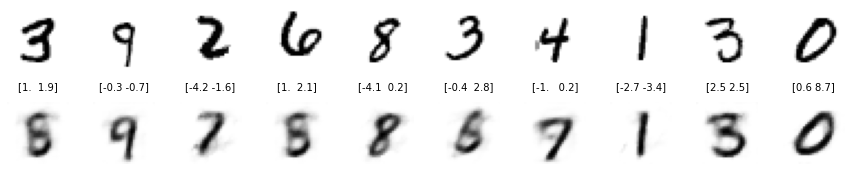

In [0]:
# Reconstructing Original Images
n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

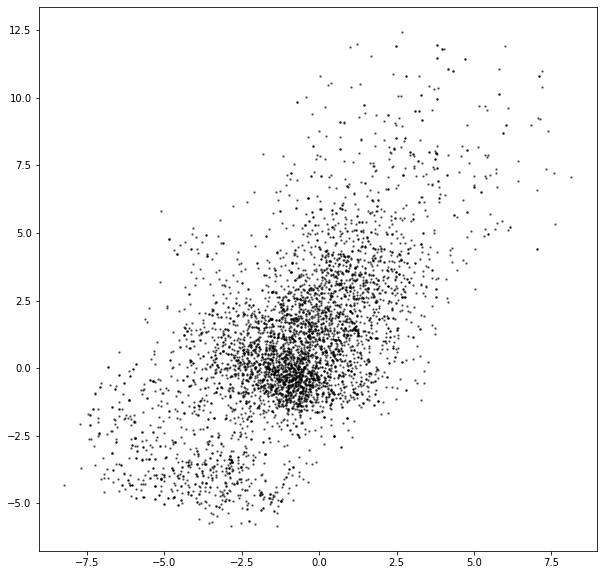

In [0]:
# Encoding된 z_points들을 visualize
n_to_show = 5000
grid_size = 15
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

plt.show()

In [13]:
# z_dim 변경 --> 3차원 으로 
AE3 = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 3
)

print(MODE)
if MODE == 'build':
    AE3.save(RUN_FOLDER)
else:
    AE3.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

build


In [14]:
AE3.encoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 7, 7, 64)          0   

In [15]:
AE3.decoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              12544     
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 14, 14, 64)        0   

In [0]:
AE3.compile(LEARNING_RATE)

In [0]:
AE3.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = 200
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1789

Epoch 00001: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 2/200
1000/1000 [==============================] - 0s 473us/step - loss: 0.0781

Epoch 00002: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 3/200
1000/1000 [==============================] - 0s 450us/step - loss: 0.0661

Epoch 00003: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 4/200
1000/1000 [==============================] - 0s 453us/step - loss: 0.0595

Epoch 00004: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 5/200
1000/1000 [==============================] - 0s 452us/step - loss: 0.0537

Epoch 00005: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 6/200
1000/1000 [====

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.138129). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 589us/step - loss: 0.0484

Epoch 00010: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 11/200
1000/1000 [==============================] - 0s 446us/step - loss: 0.0478

Epoch 00011: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 12/200
1000/1000 [==============================] - 0s 452us/step - loss: 0.0473

Epoch 00012: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 13/200
1000/1000 [==============================] - 0s 450us/step - loss: 0.0467

Epoch 00013: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 14/200
1000/1000 [==============================] - 0s 454us/step - loss: 0.0464

Epoch 00014: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 15/200
1000/1000 [=========

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.161111). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 614us/step - loss: 0.0351

Epoch 00061: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 62/200
1000/1000 [==============================] - 0s 460us/step - loss: 0.0348

Epoch 00062: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 63/200
1000/1000 [==============================] - 0s 463us/step - loss: 0.0347

Epoch 00063: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 64/200
1000/1000 [==============================] - 0s 472us/step - loss: 0.0347

Epoch 00064: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 65/200
1000/1000 [==============================] - 0s 447us/step - loss: 0.0348

Epoch 00065: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 66/200
1000/1000 [=========

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.167896). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 614us/step - loss: 0.0341

Epoch 00069: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 70/200
1000/1000 [==============================] - 0s 462us/step - loss: 0.0338

Epoch 00070: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 71/200
1000/1000 [==============================] - 0s 447us/step - loss: 0.0339

Epoch 00071: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 72/200
1000/1000 [==============================] - 0s 459us/step - loss: 0.0343

Epoch 00072: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 73/200
1000/1000 [==============================] - 0s 453us/step - loss: 0.0341

Epoch 00073: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 74/200
1000/1000 [=========

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.153500). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 604us/step - loss: 0.0326

Epoch 00084: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 85/200
1000/1000 [==============================] - 0s 458us/step - loss: 0.0325

Epoch 00085: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 86/200
1000/1000 [==============================] - 0s 469us/step - loss: 0.0323

Epoch 00086: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 87/200
1000/1000 [==============================] - 0s 456us/step - loss: 0.0322

Epoch 00087: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 88/200
1000/1000 [==============================] - 0s 456us/step - loss: 0.0322

Epoch 00088: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 89/200
1000/1000 [=========

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.159822). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 611us/step - loss: 0.0318

Epoch 00092: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 93/200
1000/1000 [==============================] - 0s 464us/step - loss: 0.0319

Epoch 00093: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 94/200
1000/1000 [==============================] - 0s 460us/step - loss: 0.0316

Epoch 00094: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 95/200
1000/1000 [==============================] - 0s 451us/step - loss: 0.0319

Epoch 00095: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 96/200
1000/1000 [==============================] - 0s 450us/step - loss: 0.0317

Epoch 00096: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 97/200
1000/1000 [=========

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.144667). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 607us/step - loss: 0.0306

Epoch 00109: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 110/200
1000/1000 [==============================] - 0s 447us/step - loss: 0.0306

Epoch 00110: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 111/200
1000/1000 [==============================] - 0s 459us/step - loss: 0.0304

Epoch 00111: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 112/200
1000/1000 [==============================] - 0s 442us/step - loss: 0.0304

Epoch 00112: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 113/200
1000/1000 [==============================] - 0s 468us/step - loss: 0.0307

Epoch 00113: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 114/200
1000/1000 [====

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.163795). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 1s 630us/step - loss: 0.0303

Epoch 00117: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 118/200
1000/1000 [==============================] - 0s 469us/step - loss: 0.0301

Epoch 00118: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 119/200
1000/1000 [==============================] - 0s 485us/step - loss: 0.0304

Epoch 00119: saving model to /drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 120/200
 768/1000 [======================>.......] - ETA: 0s - loss: 0.0307

[[  4.6884894   -1.2982016   -0.8126321 ]
 [  1.5164154    1.6769379    0.589072  ]
 [  5.8109574    2.6363804    1.2076032 ]
 [ -3.57889     -5.129252    -3.4115317 ]
 [  5.1106334    1.1670725    2.7104375 ]
 [  6.308544    -2.157002     1.5213658 ]
 [ -0.22594044   0.11973348   0.9694185 ]
 [  1.6574463    4.020888     2.5425947 ]
 [  6.500441     0.14586687  -3.7768023 ]
 [  0.6649654  -10.014056    -1.5903999 ]]


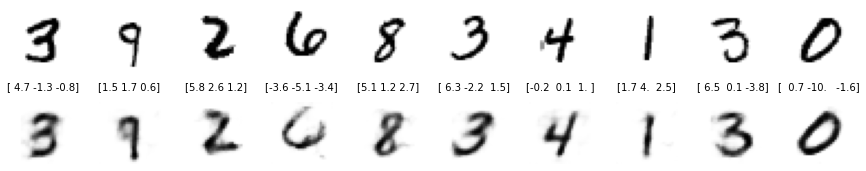

In [0]:
# AE3 Reconstructing Original Images
n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE3.encoder.predict(example_images)

print(z_points)

reconst_images = AE3.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

-7.5660033


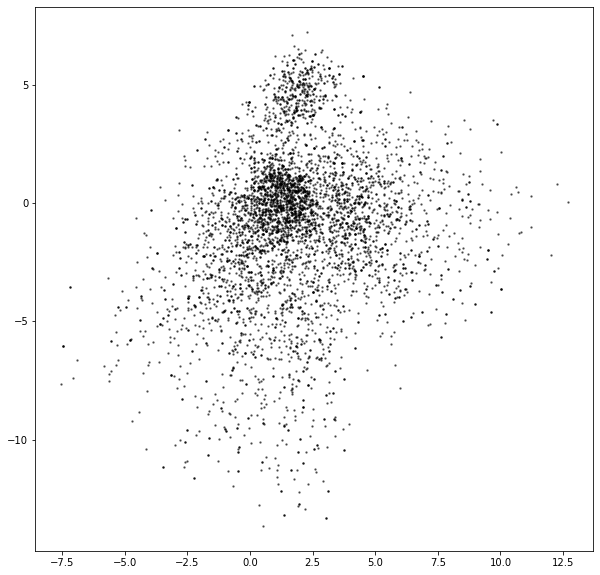

In [0]:
# AE3 Encoding된 z_points들을 visualize
n_to_show = 5000
grid_size = 15
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE3.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

print(min_x)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

plt.show()